In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
data = pd.read_excel('HomeTest1.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
data = data.dropna(subset=['customer_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
#create an invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function
data['transaction_date'] = data['transaction_date'].apply(get_month)
data.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-01,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-01,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-01,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-01,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-01,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


In [ ]:
data['Cohort Month'] =  data.groupby('customer_id')['transaction_date'].transform('min')
data.head(30)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Cohort Month
0,1,2,2950,2017-02-01,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
1,2,3,3120,2017-05-01,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-01-01
2,3,37,402,2017-10-01,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-01-01
3,4,88,3135,2017-08-01,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-01-01
5,6,25,2339,2017-03-01,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0,2017-02-01
6,7,22,1542,2017-04-01,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,2017-02-01
7,8,15,2459,2017-07-01,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0,2017-04-01
8,9,67,1305,2017-08-01,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0,2017-02-01
9,10,12,3262,2017-08-01,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,2017-01-01


In [ ]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [ ]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(data,'transaction_date')
_,Cohort_month,Cohort_year =  get_date_elements(data,'Cohort Month')

In [ ]:
#check the series
Cohort_year[:10]

0    2017
1    2017
2    2017
3    2017
4    2017
5    2017
6    2017
7    2017
8    2017
9    2017
Name: Cohort Month, dtype: int64

In [ ]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Cohort Month
0,1,2,2950,2017-02-01,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
1,2,3,3120,2017-05-01,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-01-01
2,3,37,402,2017-10-01,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-01-01
3,4,88,3135,2017-08-01,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-01-01


In [ ]:
#create a cohort index
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Cohort Month,CohortIndex
19995,19996,51,1018,2017-06-01,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-01-01,6
19996,19997,41,127,2017-11-01,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-01-01,11
19997,19998,87,2284,2017-04-01,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,1
19998,19999,6,2764,2017-07-01,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-02-01,6
19999,20000,11,1144,2017-09-01,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0,2017-03-01,7


In [ ]:
#count the customer ID by grouping by Cohort Month  and Cohort Index
cohort_data = data.groupby(['Cohort Month','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


In [ ]:
# create a pivot table
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='customer_id')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

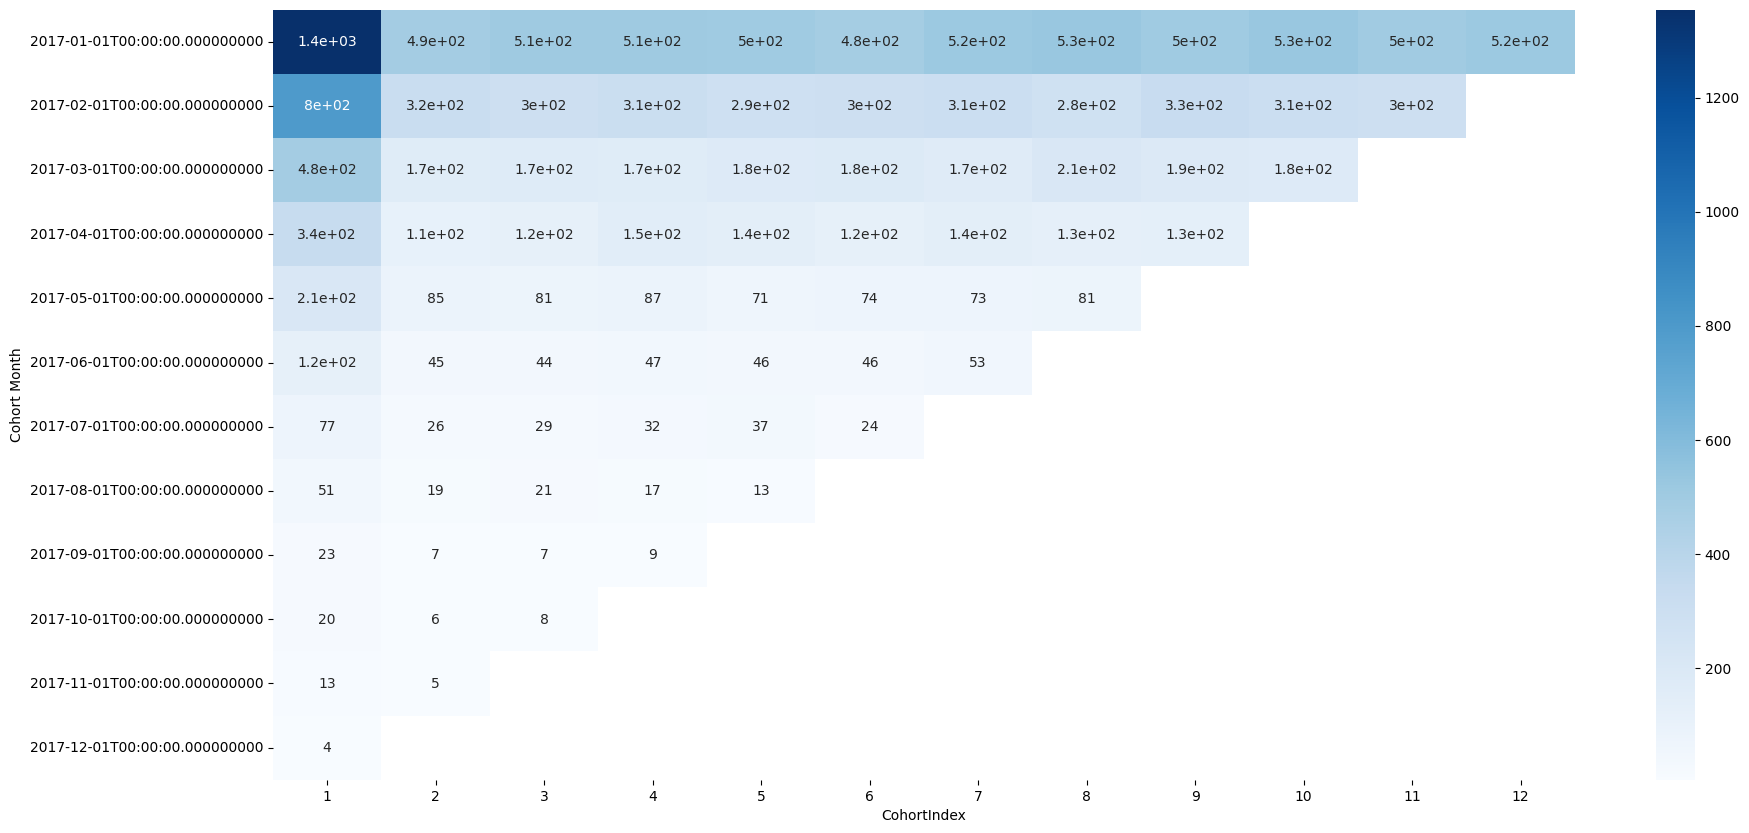

In [ ]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [ ]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2017-01-01,1.0,0.358936,0.375185,0.375923,0.370753,0.356721,0.382570,0.390694,0.369276,0.392171,0.367061,0.381093
2017-02-01,1.0,0.406250,0.372500,0.391250,0.360000,0.372500,0.385000,0.351250,0.411250,0.385000,0.370000,NaN
2017-03-01,1.0,0.345041,0.359504,0.345041,0.376033,0.380165,0.355372,0.438017,0.390496,0.373967,NaN,NaN
2017-04-01,1.0,0.330357,0.360119,0.455357,0.425595,0.360119,0.422619,0.375000,0.392857,NaN,NaN,NaN
2017-05-01,1.0,0.404762,0.385714,0.414286,0.338095,0.352381,0.347619,0.385714,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.368852,0.360656,0.385246,0.377049,0.377049,0.434426,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.337662,0.376623,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.372549,0.411765,0.333333,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.304348,0.304348,0.391304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create retention index
new_cohort_table.index = new_cohort_table.index.strftime('%Y-%m')
new_cohort_table.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='Cohort Month')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '2017-01'),
  Text(0, 1.5, '2017-02'),
  Text(0, 2.5, '2017-03'),
  Text(0, 3.5, '2017-04'),
  Text(0, 4.5, '2017-05'),
  Text(0, 5.5, '2017-06'),
  Text(0, 6.5, '2017-07'),
  Text(0, 7.5, '2017-08'),
  Text(0, 8.5, '2017-09'),
  Text(0, 9.5, '2017-10'),
  Text(0, 10.5, '2017-11'),
  Text(0, 11.5, '2017-12')])

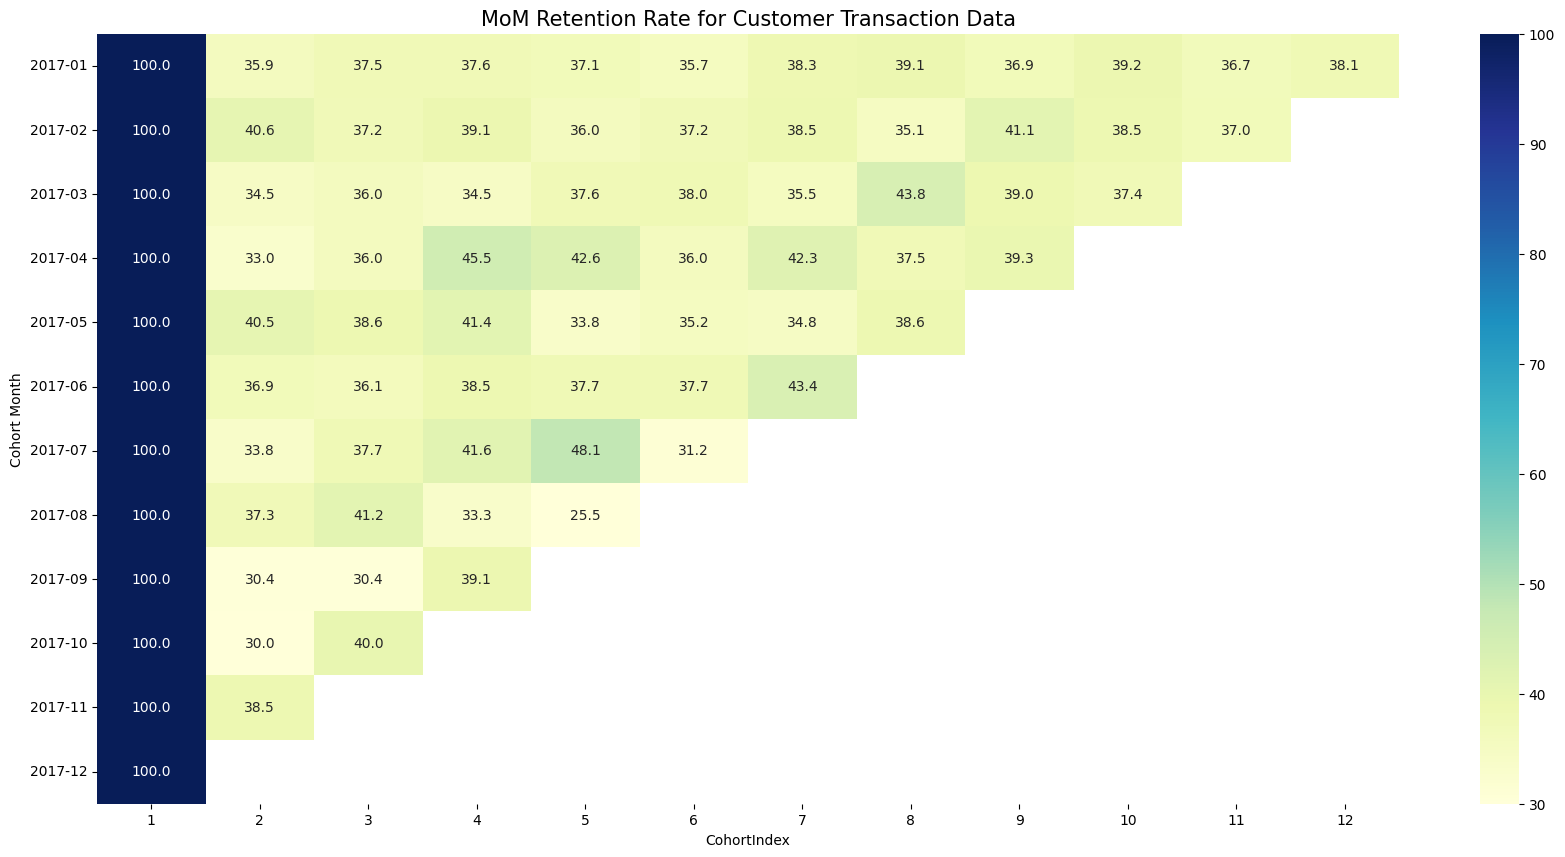

In [ ]:
#create a percentages visual

plt.figure(figsize=(21,10))
plt.title('MoM Retention Rate for Customer Transaction Data', fontsize = 15)
sns.heatmap((new_cohort_table*100).round(1),annot=True,fmt='',cmap='YlGnBu', vmin = 30 , vmax = 100)
plt.ylabel('Cohort Month')
plt.xlabel('CohortIndex')
plt.yticks( rotation='horizontal')


# Mục mới